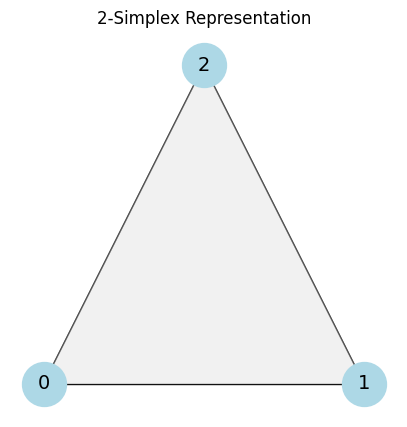

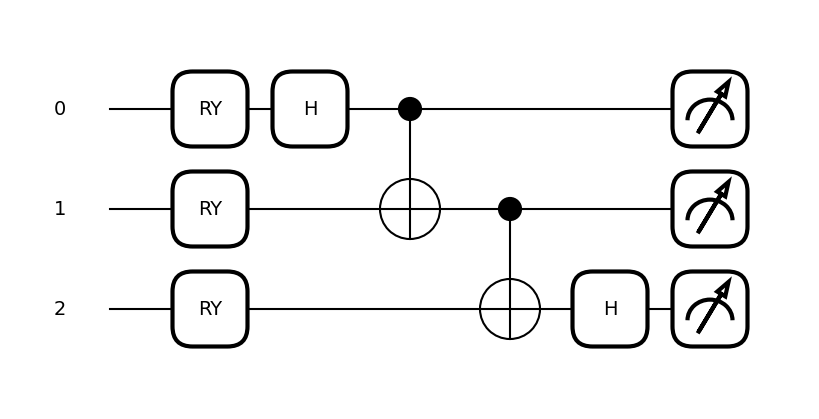

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pennylane as qml
import numpy as np

# --- STEP 1: Classical Simplicial Complex Visualization ---
def plot_simplicial_complex():
    """Visualizes a 2-simplex (triangle) with labeled vertices."""
    fig, ax = plt.subplots(figsize=(5, 5))
    
    # Define simplex vertices
    vertices = {
        0: (0, 0),  # Bottom-left
        1: (1, 0),  # Bottom-right
        2: (0.5, np.sqrt(3)/2)  # Top
    }
    
    # Define simplex edges
    edges = [(0, 1), (1, 2), (2, 0)]

    # Create a graph representation
    G = nx.Graph()
    G.add_nodes_from(vertices.keys())
    G.add_edges_from(edges)

    # Draw the simplex structure
    nx.draw(G, pos=vertices, with_labels=True, node_color="lightblue", edge_color="black", node_size=1000, font_size=14)

    # Fill the triangle to represent a 2-simplex
    simplex = [vertices[v] for v in [0, 1, 2]]
    ax.fill(*zip(*simplex), color="lightgray", alpha=0.3)

    plt.title("2-Simplex Representation")
    plt.show()

# --- STEP 2: Quantum Circuit Visualization ---
def quantum_topology_circuit():
    """Defines and visualizes a quantum circuit encoding a simplicial complex."""
    dev = qml.device("default.qubit", wires=3)

    @qml.qnode(dev)
    def circuit():
        """Quantum circuit encoding a 2-simplex."""
        qml.RY(np.pi, wires=0)  # Encoding vertex 0
        qml.RY(np.pi / 2, wires=1)  # Encoding vertex 1
        qml.RY(np.pi / 4, wires=2)  # Encoding vertex 2

        # Simulating connectivity
        qml.Hadamard(wires=0)
        qml.CNOT(wires=[0, 1])
        qml.CNOT(wires=[1, 2])
        qml.Hadamard(wires=2)

        return qml.probs(wires=[0, 1, 2])

    # Visualize the quantum circuit
    qml.draw_mpl(circuit)()
    plt.show()

# Generate both visualizations
plot_simplicial_complex()
quantum_topology_circuit()
